In [1]:
import numpy as np
import os

# กำหนดชื่อไฟล์ .npz ที่คุณบันทึกไว้
# ตรวจสอบให้แน่ใจว่าไฟล์นี้อยู่ในโฟลเดอร์ BASE_OUTPUT_PATH หรือระบุ path ที่ถูกต้อง
NPZ_FILE_PATH = '/kaggle/input/landmarks-with-label/all_data_with_landmarks1.npz'

def load_and_prepare_data(npz_file_path):
    """
    Loads the .npz file and prepares the data into X_train, y_train, etc.

    Args:
        npz_file_path (str): Path to the .npz file containing the processed data.

    Returns:
        tuple: A tuple containing (X_train, y_train, X_val, y_val, X_test, y_test,
                                   train_filenames, val_filenames, test_filenames)
               X will be a dictionary containing 'landmarks', 'landmark_indices', 'connections'.
               y will be a numpy array of labels.
               filenames will be a numpy array of filenames.
               Returns (None, ...) if the file is not found.
    """
    if not os.path.exists(npz_file_path):
        print(f"Error: File not found at {npz_file_path}")
        return None, None, None, None, None, None, None, None, None

    # โหลดข้อมูลจากไฟล์ .npz
    data = np.load(npz_file_path, allow_pickle=True) # allow_pickle=True เนื่องจากเราเก็บ array of objects

    all_landmarks = data['landmarks']
    all_landmark_indices = data['landmark_indices']
    all_connections = data['connections']
    all_labels = data['labels']
    all_splits = data['splits']
    all_filenames = data['filenames']

    # Initialize lists to hold data for each split
    X_train_landmarks, X_train_indices, X_train_connections, y_train, train_filenames = [], [], [], [], []
    X_val_landmarks, X_val_indices, X_val_connections, y_val, val_filenames = [], [], [], [], []
    X_test_landmarks, X_test_indices, X_test_connections, y_test, test_filenames = [], [], [], [], []

    print("กำลังแยกข้อมูลตาม split และเตรียม X, y...")
    for i in range(len(all_splits)):
        current_split = all_splits[i].lower()
        
        # Determine which list to append to
        if current_split == 'train':
            X_landmarks_list, X_indices_list, X_connections_list, y_list, filenames_list = \
                X_train_landmarks, X_train_indices, X_train_connections, y_train, train_filenames
        elif current_split == 'valid':
            X_landmarks_list, X_indices_list, X_connections_list, y_list, filenames_list = \
                X_val_landmarks, X_val_indices, X_val_connections, y_val, val_filenames
        elif current_split == 'test':
            X_landmarks_list, X_indices_list, X_connections_list, y_list, filenames_list = \
                X_test_landmarks, X_test_indices, X_test_connections, y_test, test_filenames
        else:
            print(f"คำเตือน: ไม่รู้จัก split type '{all_splits[i]}' สำหรับไฟล์ '{all_filenames[i]}'. ข้ามข้อมูลนี้.")
            continue # ข้ามข้อมูลที่ไม่รู้จัก split

        # Append data to the respective lists
        X_landmarks_list.append(all_landmarks[i])
        X_indices_list.append(all_landmark_indices[i])
        X_connections_list.append(all_connections[i])
        y_list.append(all_labels[i])
        filenames_list.append(all_filenames[i])

    # Convert lists to NumPy arrays
    # X variables are dictionaries, so combine their lists into dictionaries of arrays
    X_train = {
        'landmarks': np.array(X_train_landmarks, dtype=object),
        'connections': np.array(X_train_connections, dtype=object)
    }
    y_train = np.array(y_train)
    train_filenames = np.array(train_filenames)

    X_val = {
        'landmarks': np.array(X_val_landmarks, dtype=object),
        'connections': np.array(X_val_connections, dtype=object)
    }
    y_val = np.array(y_val)
    val_filenames = np.array(val_filenames)

    X_test = {
        'landmarks': np.array(X_test_landmarks, dtype=object),
        'connections': np.array(X_test_connections, dtype=object)
    }
    y_test = np.array(y_test)
    test_filenames = np.array(test_filenames)


    print("การเตรียมข้อมูล X, y และแยก split เสร็จสมบูรณ์")
    print(f"Train Set Size: {len(y_train)}")
    print(f"Validation Set Size: {len(y_val)}")
    print(f"Test Set Size: {len(y_test)}")

    return X_train, y_train, X_val, y_val, X_test, y_test, \
           train_filenames, val_filenames, test_filenames

if __name__ == '__main__':
    X_train, y_train, X_val, y_val, X_test, y_test, \
    train_filenames, val_filenames, test_filenames = load_and_prepare_data(NPZ_FILE_PATH)

    if X_train is not None:
        print("\n--- ตัวอย่างข้อมูลที่ถูกแยกแล้ว ---")
        print("X_train (landmarks) รูปร่าง:", X_train['landmarks'].shape)
        print("y_train (labels) รูปร่าง:", y_train.shape)
        print("y_train ตัวอย่าง:", y_train[:5])
        print("filenames ของ Train Set ตัวอย่าง:", train_filenames[:5])


        print("\nX_val (landmarks) รูปร่าง:", X_val['landmarks'].shape)
        print("y_val (labels) รูปร่าง:", y_val.shape)
        print("y_val ตัวอย่าง:", y_val[:5])

        print("\nX_test (landmarks) รูปร่าง:", X_test['landmarks'].shape)
        print("y_test (labels) รูปร่าง:", y_test.shape)
        print("y_test ตัวอย่าง:", y_test[:5])

        # ตัวอย่างการเข้าถึงข้อมูลของรูปแรกใน X_train
        print("\nLandmarks ของรูปแรกใน X_train:", X_train['landmarks'].shape)
        print("Connections ของรูปแรกใน X_train:", X_train['connections'].shape)

        # คุณสามารถใช้ X_train, y_train ในการฝึกโมเดลได้เลย
        # และใช้ X_val, y_val ในการตรวจสอบประสิทธิภาพระหว่างการฝึกและปรับแต่งโมเดล
        # ใช้ X_test, y_test ในการประเมินประสิทธิภาพขั้นสุดท้ายของโมเดล

กำลังแยกข้อมูลตาม split และเตรียม X, y...
การเตรียมข้อมูล X, y และแยก split เสร็จสมบูรณ์
Train Set Size: 22645
Validation Set Size: 2803
Test Set Size: 2852

--- ตัวอย่างข้อมูลที่ถูกแยกแล้ว ---
X_train (landmarks) รูปร่าง: (22645, 92, 3)
y_train (labels) รูปร่าง: (22645,)
y_train ตัวอย่าง: ['neutral' 'neutral' 'neutral' 'neutral' 'sadness']
filenames ของ Train Set ตัวอย่าง: ['fer0000000.png' 'fer0000001.png' 'fer0000002.png' 'fer0000004.png'
 'fer0000006.png']

X_val (landmarks) รูปร่าง: (2803, 92, 3)
y_val (labels) รูปร่าง: (2803,)
y_val ตัวอย่าง: ['neutral' 'happiness' 'happiness' 'neutral' 'neutral']

X_test (landmarks) รูปร่าง: (2852, 92, 3)
y_test (labels) รูปร่าง: (2852,)
y_test ตัวอย่าง: ['sadness' 'neutral' 'surprise' 'anger' 'neutral']

Landmarks ของรูปแรกใน X_train: (22645, 92, 3)
Connections ของรูปแรกใน X_train: (22645, 160, 6)


In [2]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

# --- ส่วนที่แก้ไข ---
# 1. Flatten Landmarks

# แปลงแต่ละ sample ให้เป็น numpy array ก่อน แล้วจึง reshape
# ทำแยก 2 input
X_train_landmarks_flattened = [np.array(sample, dtype=np.float32).reshape(len(sample), -1) for sample in X_train['landmarks']]
X_test_landmarks_flattened = [np.array(sample, dtype=np.float32).reshape(len(sample), -1) for sample in X_test['landmarks']]
X_val_landmarks_flattened = [np.array(sample, dtype=np.float32).reshape(len(sample), -1) for sample in X_val['landmarks']]
X_train_connections_flattened = [np.array(sample, dtype=np.float32).reshape(len(sample), -1) for sample in X_train['connections']]
X_test_connections_flattened = [np.array(sample, dtype=np.float32).reshape(len(sample), -1) for sample in X_test['connections']]
X_val_connections_flattened = [np.array(sample, dtype=np.float32).reshape(len(sample), -1) for sample in X_val['connections']]

# รวม input
# def flatten_and_combine(data_dict):
#     combined_flattened_data = []
#     num_samples = len(data_dict['landmarks']) # ใช้จำนวน sample จาก landmarks (หรือ connections ก็ได้ เพราะเท่ากัน)

#     for i in range(num_samples):
#         # Flatten landmarks to 1D
#         landmark_flat = np.array(data_dict['landmarks'][i], dtype=np.float32).flatten()
        
#         # Flatten connections to 1D
#         connection_flat = np.array(data_dict['connections'][i], dtype=np.float32).flatten()
        
#         # Concatenate the 1D arrays
#         # เนื่องจากเป็น 1D array อยู่แล้ว การ concatenate จะต่อกันไปเลย
#         combined_data_for_sample = np.concatenate((landmark_flat, connection_flat))
        
#         combined_flattened_data.append(combined_data_for_sample)
    
#     return combined_flattened_data

# print("กำลัง Flatten และรวมข้อมูล 'landmarks' และ 'connections'...")

# X_train_flattened = flatten_and_combine(X_train)
# X_test_flattened = flatten_and_combine(X_test)
# X_val_flattened = flatten_and_combine(X_val)

# print("Flatten และรวมข้อมูลเสร็จสมบูรณ์")


# 2. Padding (ส่วนนี้มักจะถูกต้องอยู่แล้ว)
print("กำลังทำการ Padding ข้อมูล...")
# แยก input
X_train_landmarks_padded = pad_sequences(X_train_landmarks_flattened, padding='post', dtype='float32')
X_test_landmarks_padded = pad_sequences(X_test_landmarks_flattened, padding='post', dtype='float32')
X_val_landmarks_padded = pad_sequences(X_val_landmarks_flattened, padding='post', dtype='float32')
X_train_connections_padded = pad_sequences(X_train_connections_flattened, padding='post', dtype='float32')
X_test_connections_padded = pad_sequences(X_test_connections_flattened, padding='post', dtype='float32')
X_val_connections_padded = pad_sequences(X_val_connections_flattened, padding='post', dtype='float32')

# รวม input
# X_train_padded = pad_sequences(X_train_flattened, padding='post', dtype='float32')
# X_test_padded = pad_sequences(X_test_flattened, padding='post', dtype='float32')
# X_val_padded = pad_sequences(X_val_flattened, padding='post', dtype='float32')
print("Padding เสร็จสมบูรณ์")

# encoding
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)
print("\n--- หลังทำ Label Encoding ---")
print("Mapping ของ Label Encoder:", list(label_encoder.classes_), "->", list(range(len(label_encoder.classes_))))
print("y_train_encoded:", y_train)
print("y_val_encoded:", y_val)
print("y_test_encoded:", y_test)

# แก้ไขให้เป็น 3 มิติ
# X_train_landmarks_padded = np.expand_dims(X_train_landmarks_padded, axis=-1)
# X_test_landmarks_padded = np.expand_dims(X_test_landmarks_padded, axis=-1)
# X_val_landmarks_padded = np.expand_dims(X_val_landmarks_padded, axis=-1)
# X_train_connections_padded = np.expand_dims(X_train_connections_padded, axis=-1)
# X_test_connections_padded = np.expand_dims(X_test_connections_padded, axis=-1)
# X_val_connections_padded = np.expand_dims(X_val_connections_padded, axis=-1)

# X_train_padded = np.expand_dims(X_train_padded, axis=-1)
# X_test_padded = np.expand_dims(X_test_padded, axis=-1)
# X_val_padded = np.expand_dims(X_val_padded, axis=-1)

# ตรวจสอบรูปร่างของข้อมูลหลัง Padding เพื่อยืนยัน
print("\nรูปร่างของ X_train_padded:", X_train_landmarks_padded.shape)
print("รูปร่างของ X_test_padded:", X_test_landmarks_padded.shape)
print("รูปร่างของ X_val_padded:", X_val_landmarks_padded.shape)
print("\nรูปร่างของ X_train_padded:", X_train_connections_padded.shape)
print("รูปร่างของ X_test_padded:", X_test_connections_padded.shape)
print("รูปร่างของ X_val_padded:", X_val_connections_padded.shape)
# print("\nรูปร่างของ X_train_padded:", X_train_padded.shape)
# print("รูปร่างของ X_test_padded:", X_test_padded.shape)
# print("รูปร่างของ X_val_padded:", X_val_padded.shape)

2025-07-13 07:40:55.440845: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752392455.778203      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752392455.886483      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


กำลังทำการ Padding ข้อมูล...
Padding เสร็จสมบูรณ์

--- หลังทำ Label Encoding ---
Mapping ของ Label Encoder: ['anger', 'disgust', 'fear', 'happiness', 'neutral', 'sadness', 'surprise'] -> [0, 1, 2, 3, 4, 5, 6]
y_train_encoded: [4 4 4 ... 0 4 4]
y_val_encoded: [4 3 3 ... 3 4 4]
y_test_encoded: [5 4 6 ... 4 3 5]

รูปร่างของ X_train_padded: (22645, 92, 3)
รูปร่างของ X_test_padded: (2852, 92, 3)
รูปร่างของ X_val_padded: (2803, 92, 3)

รูปร่างของ X_train_padded: (22645, 160, 6)
รูปร่างของ X_test_padded: (2852, 160, 6)
รูปร่างของ X_val_padded: (2803, 160, 6)


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense, Concatenate, BatchNormalization, Dropout, Flatten, Bidirectional
# --- Input สำหรับ Landmarks ---
# input_shape ต้องเป็น (timesteps, features)
num_classes = len(np.unique(y_train))

landmarks_input = Input(shape=(X_train_landmarks_padded.shape[1], X_train_landmarks_padded.shape[2]), name='landmarks_input')
x_landmarks_train = Bidirectional(LSTM(units=128, return_sequences=True))(landmarks_input)
x_landmarks_train = BatchNormalization()(x_landmarks_train)
x_landmarks_train = Dropout(0.2)(x_landmarks_train)
x_landmarks_train = Bidirectional(LSTM(units=64))(x_landmarks_train) # ชั้นสุดท้ายไม่ต้อง return_sequences=True
x_landmarks_train = BatchNormalization()(x_landmarks_train)
x_landmarks_train = Dropout(0.2)(x_landmarks_train)

# --- Input สำหรับ Connections ---
connections_input = Input(shape=(X_train_connections_padded.shape[1], X_train_connections_padded.shape[2]), name='connections_input')
x_connections_train = Bidirectional(LSTM(units=128, return_sequences=True))(connections_input)
x_connections_train = BatchNormalization()(x_connections_train)
x_connections_train = Dropout(0.2)(x_connections_train)
x_connections_train = Bidirectional(LSTM(units=64))(x_connections_train) # ชั้นสุดท้ายไม่ต้อง return_sequences=True
x_connections_train = BatchNormalization()(x_connections_train)
x_connections_train = Dropout(0.2)(x_connections_train)

# --- รวม Output จากทั้งสองส่วนเข้าด้วยกัน ---
# คุณอาจต้อง Flatten ผลลัพธ์ของ LSTM ก่อน Concatenate หากต้องการต่อในมิติ features
# หรือใช้ GlobalAveragePooling1D/GlobalMaxPooling1D หากต้องการลดมิติ
combined_features = Concatenate()([x_landmarks_train, x_connections_train]) # ต่อผลลัพธ์ของ LSTM

# --- Output Layer ---
combined_features = Dense(64, activation='relu')(combined_features)
combined_features = BatchNormalization()(combined_features)
combined_features = Dropout(0.2)(combined_features)
output = Dense(num_classes, activation='softmax')(combined_features)

I0000 00:00:1752392478.171303      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1752392478.172004      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [4]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Input, Dropout, BatchNormalization, Bidirectional

# # หาจำนวนคลาสทั้งหมด
# num_classes = len(np.unique(y_train))
# # หารูปร่างของข้อมูล Input
# sequence_length = X_train_padded.shape[1] # ความยาวของซีเควนซ์หลัง padding
# num_features = X_train_padded.shape[2]    # จำนวน features หลัง flatten

# model = Sequential()

# #1st layer
# model.add(Bidirectional(LSTM(units=256, return_sequences=True, input_shape=(sequence_length, num_features))))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))

# #2nd layer
# model.add(Bidirectional(LSTM(units=128, return_sequences=True)))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))

# #3rd layer
# model.add(Bidirectional(LSTM(units=128, return_sequences=True)))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))

# #4th layer
# model.add(Bidirectional(LSTM(units=64)))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))

# #output layer
# model.add(Dense(units=num_classes, activation='softmax'))
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# model.summary()

In [5]:
from tensorflow.keras.models import Model
model = Model(inputs=[landmarks_input, connections_input], outputs=output)

# Compile และ Summary
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ landmarks_input           │ (None, 92, 3)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ connections_input         │ (None, 160, 6)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional             │ (None, 92, 256)        │        135,168 │ landmarks_input[0][0]  │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_2           │ (None, 160, 256)       │        138,240 │ connections_input[0][… │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 92, 256)        │          1,024 │ bidirectional[0][0]    │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 160, 256)       │          1,024 │ bidirectional_2[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 92, 256)        │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 160, 256)       │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_1           │ (None, 128)            │        164,352 │ dropout[0][0]          │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_3           │ (None, 128)            │        164,352 │ dropout_2[0][0]        │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 128)            │            512 │ bidirectional_1[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 128)            │            512 │ bidirectional_3[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 128)            │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)       │ (None, 128)            │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concaten

 Total params: 622,343 (2.37 MB)

 Trainable params: 620,679 (2.37 MB)

 Non-trainable params: 1,664 (6.50 KB)

In [6]:
X_train_input_list = [X_train_landmarks_padded, X_train_connections_padded]
X_test_input_list = [X_test_landmarks_padded, X_test_connections_padded]
X_val_input_list = [X_val_landmarks_padded, X_val_connections_padded]

In [7]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_accuracy', mode='max')

In [8]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy', # เหมาะสำหรับ label ที่เป็นเลขจำนวนเต็ม (0, 1, 2, ...)
    metrics=['accuracy']
)

# เริ่มการฝึกโมเดล
history = model.fit(
    # X_train_padded,
    X_train_input_list,
    y_train,
    validation_data=(X_val_input_list, y_val), # ใช้ X_val ที่เตรียมแล้ว
    epochs=100, # จำนวนรอบในการฝึก
    batch_size=32,
    callbacks=[early_stopping, model_checkpoint])

Epoch 1/100


I0000 00:00:1752392492.658599      62 cuda_dnn.cc:529] Loaded cuDNN version 90300


708/708 ━━━━━━━━━━━━━━━━━━━━ 45s 43ms/step - accuracy: 0.4331 - loss: 1.6921 - val_accuracy: 0.6475 - val_loss: 1.0555
Epoch 2/100
708/708 ━━━━━━━━━━━━━━━━━━━━ 29s 41ms/step - accuracy: 0.6182 - loss: 1.1185 - val_accuracy: 0.6193 - val_loss: 1.1624
Epoch 3/100
708/708 ━━━━━━━━━━━━━━━━━━━━ 29s 41ms/step - accuracy: 0.6497 - loss: 1.0294 - val_accuracy: 0.5391 - val_loss: 1.3818
Epoch 4/100
708/708 ━━━━━━━━━━━━━━━━━━━━ 29s 41ms/step - accuracy: 0.6539 - loss: 1.0014 - val_accuracy: 0.6318 - val_loss: 1.0745
Epoch 5/100
708/708 ━━━━━━━━━━━━━━━━━━━━ 29s 41ms/step - accuracy: 0.6645 - loss: 0.9758 - val_accuracy: 0.4838 - val_loss: 1.5062
Epoch 6/100
708/708 ━━━━━━━━━━━━━━━━━━━━ 29s 41ms/step - accuracy: 0.6647 - loss: 0.9707 - val_accuracy: 0.6957 - val_loss: 0.8971
Epoch 7/100
708/708 ━━━━━━━━━━━━━━━━━━━━ 29s 41ms/step - accuracy: 0.6762 - loss: 0.9472 - val_accuracy: 0.5672 - val_loss: 1.2193
Epoch 8/100
708/708 ━━━━━━━━━━━━━━━━━━━━ 30s 42ms/step - accuracy: 0.6820 - loss: 0.9345 - val_

In [9]:
test_loss, test_accuracy = model.evaluate(X_test_input_list, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.7201 - loss: 0.7929
Test Accuracy: 72.12%


90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step
Predicted Classes (y_pred): [5 4 6 ... 4 4 4]
True Classes (y_true):      [5 4 6 ... 4 3 5]

============== Classification Report ==============
              precision    recall  f1-score   support

       anger       0.65      0.46      0.54       229
     disgust       0.00      0.00      0.00        19
        fear       0.47      0.09      0.15        76
   happiness       0.83      0.88      0.85       846
     neutral       0.68      0.84      0.76       962
     sadness       0.53      0.27      0.35       331
    surprise       0.71      0.78      0.74       389

    accuracy                           0.72      2852
   macro avg       0.55      0.47      0.49      2852
weighted avg       0.70      0.72      0.70      2852



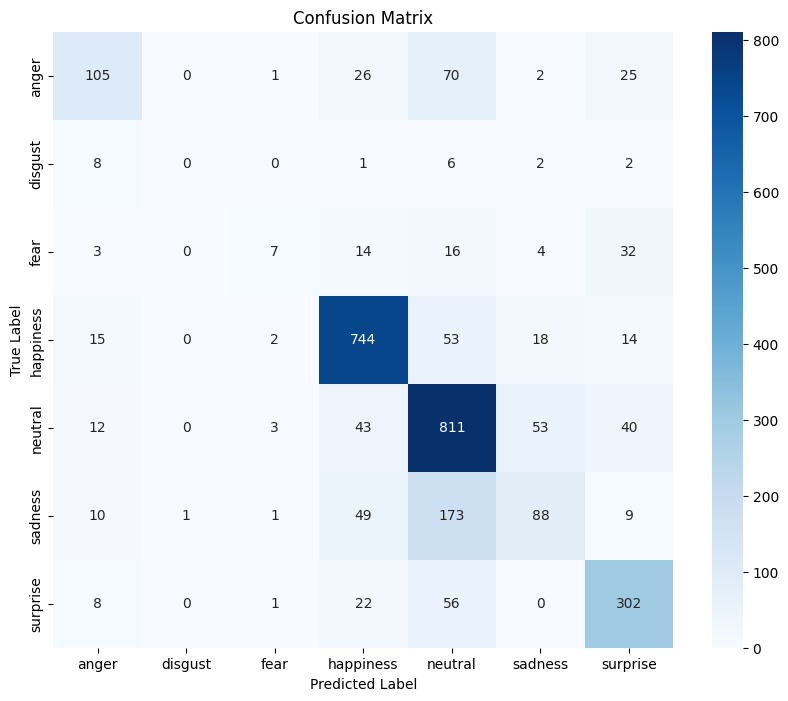

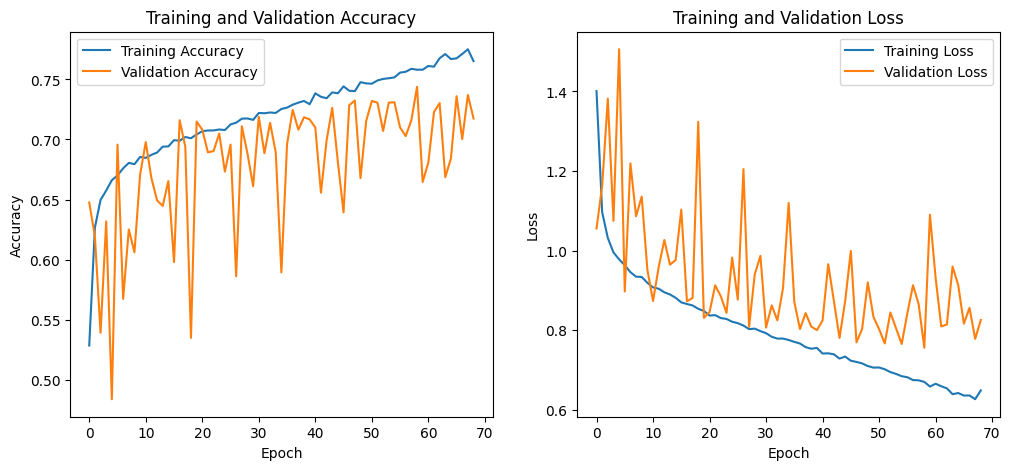

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

class_names = list(label_encoder.classes_)
class_indices = list(range(len(label_encoder.classes_)))

# 1. ทำนายค่าจากข้อมูลทดสอบ (จะได้ผลลัพธ์เป็นความน่าจะเป็น)
# y_pred_probs = model.predict(X_test_padded) # <-- ใช้บรรทัดนี้เมื่อรันกับโมเดลจริง
y_pred_probs = model.predict(X_test_input_list)


# 2. แปลงค่าความน่าจะเป็นให้เป็นคลาสที่ถูกทำนาย (หา index ที่มีค่าสูงสุด)
y_pred = np.argmax(y_pred_probs, axis=1)
print(f"Predicted Classes (y_pred): {y_pred}") # ผลลัพธ์: [0 1 2 0]

# 3. แปลงค่า y_test จาก One-Hot Encoding ให้เป็นคลาสที่แท้จริง
# 💡 หาก y_test ของคุณเป็น array 1 มิติอยู่แล้ว (เช่น [0, 1, 2, 1]) ไม่จำเป็นต้องทำขั้นตอนนี้
# ให้ใช้ y_true = y_test ได้เลย
# y_true = np.argmax(y_test_one_hot, axis=1)
y_true = y_test
print(f"True Classes (y_true):      {y_true}") # ผลลัพธ์: [0 1 2 1]

# 4. สร้างและแสดง Classification Report
print("\n============== Classification Report ==============")
report = classification_report(y_true, y_pred, target_names=class_names)
print(report)
print("================================================")

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred, labels=class_indices) # ใช้ Index ของคลาสทั้งหมด
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names) # ใช้ชื่อของคลาสทั้งหมด
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# พล็อตกราฟ Accuracy และ Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()